<a href="https://colab.research.google.com/github/DiliniKB/Steganography/blob/main/A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
image1 = cv2.imread('16.jpg')

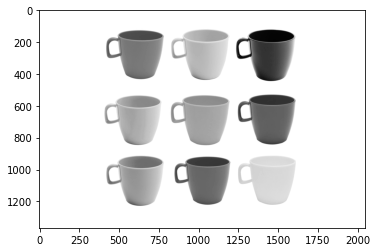

In [ ]:
gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

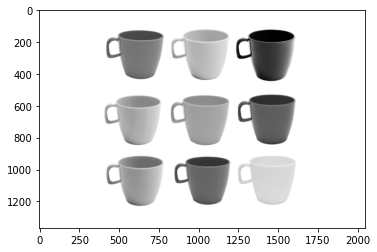

In [ ]:
blur = cv2.GaussianBlur(gray, (5,5), 0)
plt.imshow(blur, cmap='gray')

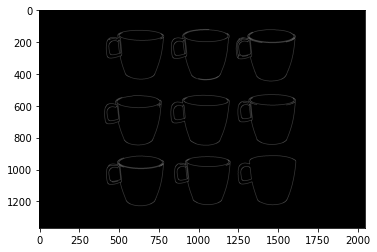

In [ ]:
canny = cv2.Canny(blur, 10, 150, 3)
plt.imshow(canny, cmap='gray')

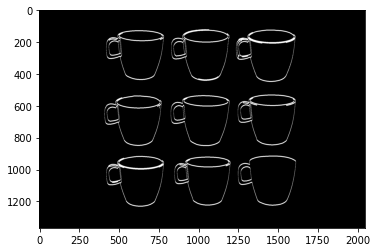

In [ ]:
dilated = cv2.dilate(canny, (1, 1), iterations=5)
plt.imshow(dilated, cmap='gray')

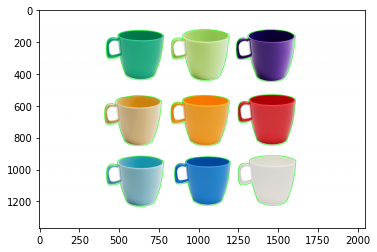

In [ ]:
(cnt, hierarchy) = cv2.findContours(
    dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)
 
plt.imshow(rgb)

In [ ]:
print("objects in the image : ", len(cnt))

objects in the image :  9


In [ ]:
def count(image):
  image = cv2.imread(image)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  blur = cv2.GaussianBlur(gray, (5,5), 0)
  canny = cv2.Canny(blur, 10, 150, 3)
  dilated = cv2.dilate(canny, (1, 1), iterations=5)
  (cnt, hierarchy) = cv2.findContours(
    dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
  cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)
  print("objects in the image : ", len(cnt))

In [ ]:
count("16.jpg")

objects in the image :  9


In [ ]:
image2 = cv2.imread('17.jpeg')
plt.imshow(image2)

In [ ]:
count("17.jpg")

objects in the image :  211


In [ ]:
import random

In [ ]:
#steganography encrypt

def encrypt(image1, image2):
  img1 = cv2.imread(image1)
  img2 = cv2.imread(image2)
  
  for i in range(img2.shape[0]):
    for j in range(img2.shape[1]):
      for l in range(3):
				
				# v1 and v2 are 8-bit pixel values
				# of img1 and img2 respectively
        v1 = format(img1[i][j][l], '08b')
        v2 = format(img2[i][j][l], '08b')
				
				# Taking 4 MSBs of each image
        v3 = v1[:4] + v2[:4]
				
        img1[i][j][l]= int(v3, 2)
  cv2.imwrite('pic3in2.png', img1)

In [ ]:
encrypt("17.jpg","16.jpg")

In [ ]:
#steganography decrypt

def decrypt(image):

  # Encrypted image
	img = cv2.imread(image)
	width = img.shape[0]
	height = img.shape[1]
	
	# img1 and img2 are two blank images
	img1 = np.zeros((width, height, 3), np.uint8)
	img2 = np.zeros((width, height, 3), np.uint8)
	
	for i in range(width):
		for j in range(height):
			for l in range(3):
				v1 = format(img[i][j][l], '08b')
				v2 = v1[:4] + chr(random.randint(0, 1)+48) * 4
				v3 = v1[4:] + chr(random.randint(0, 1)+48) * 4
				
				# Appending data to img1 and img2
				img1[i][j][l]= int(v2, 2)
				img2[i][j][l]= int(v3, 2)
	
	# These are two images produced from
	# the encrypted image
	cv2.imwrite('pic2_re.png', img1)
	cv2.imwrite('pic3_re.png', img2)

In [ ]:
decrypt('pic3in2.png')

In [44]:
count('pic2_re.png')

objects in the image :  214


In [45]:
count('pic3_re.png')

objects in the image :  201
